# MODELOS DE MACHINE LEARNING / VIVIENDAS A LA VENTA

## LIBRERIAS

Las librerias utilizadas en este proyecto son:

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from tabulate import tabulate
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns


# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline

# Varios
# ==============================================================================
import multiprocessing
import random

## DATOS 

In [2]:
datos=pd.read_csv('df_Comprar_final.csv')

In [3]:
datos.head()

,Unnamed: 0,id,url,subtype,transaction,owner,sell-type,provider,title,location,features,description,price,price2,m2,rooms,parking,distrito,cambio_precio,baños
0,0,id41022004397639,https://www.habitaclia.com/comprar-piso-obra_nueva_calle_carme_23_raval-barcelona-i41022004397639.htm?f=&geo=d&coddists=100&from=list&lo=55,FLAT,SALE,PROFESSIONAL,SECOND_HAND,41022-1,"Piso en Carrer carme, 23. Obra nueva",Barcelona - Raval,61m2 - 1 habitacion - 1 baño - 4.754€/m2,"En el distrito de Ciutat Vella, en pleno barrio del Raval, les ofrecemos una promoción de 10 viviendas en un edificio de...",Oportunidad\n290.000 €\nha bajado 10.000 €,290000,61,1,No,Ciutat Vella,Si,1
1,1,id4190004382165,https://www.habitaclia.com/comprar-piso-oportunidad_de_inversion_en_pleno_centro_de_raval-barcelona-i4190004382165.htm?f=&geo=d&coddists=100&from=list&lo=55,FLAT,SALE,PROFESSIONAL,SECOND_HAND,4190-2,Piso Riera baixa. Oportunidad de inversión en pleno centro de barcelona.,Barcelona - Raval,37m2 - 2 habitaciones - 1 baño - 2.919€/m2,Oportunidad de inversión en pleno centro de Barcelona. Vivienda de 37m² que cuenta con dos habitaciones y un baño y un...,Oportunidad\n108.000 €,108000,37,2,No,Ciutat Vella,No,1
2,2,id41022004405185,https://www.habitaclia.com/comprar-piso-obra_nueva_calle_princep_de_viana_14_raval-barcelona-i41022004405185.htm?f=&geo=d&coddists=100&from=list&lo=55,FLAT,SALE,PROFESSIONAL,SECOND_HAND,41022-1,"Piso en Carrer princep de viana, 14. Obra nueva",Barcelona - Raval,60m2 - 2 habitaciones - 1 baño - 6.267€/m2,"Exclusiva promoción de 11 viviendas únicas de obra nueva. Se trata de la rehabilitación integral de una finca clásica, e...",376.000 €\nha bajado 20.000 €,376000,60,2,No,Ciutat Vella,Si,1
3,3,id29169000001903,https://www.habitaclia.com/comprar-piso-gotic-barcelona-i29169000001903.htm?f=&geo=d&coddists=100&from=list&lo=55,FLAT,SALE,PROFESSIONAL,SECOND_HAND,29169-1,Piso Carrer d'avinyó,Barcelona - Gòtic,101m2 - 3 habitaciones - 2 baños - 7.079€/m2,"En el emblemático barrio del Gotic , el barrio con más personalidad de la ciudad Condal delimitado por Las Ramblas, Vía...",715.000 €,715000,101,3,No,Ciutat Vella,No,2
4,4,id41022004397648,https://www.habitaclia.com/comprar-piso-obra_nueva_calle_massanet_6_st_pere_sta_caterina_el_born-barcelona-i41022004397648.htm?f=&geo=d&coddists=100&from=list&lo=55,FLAT,SALE,PROFESSIONAL,SECOND_HAND,41022-1,"Piso en Carrer massanet, 6. Obra nueva",Barcelona - St. Pere - Sta. Caterina - El Born,82m2 - 2 habitaciones - 2 baños - 4.634€/m2,"En el emblemático barrio del Born, junto al mercado de Santa Caterina y próximo a la Catedral de Barcelona, les ofrecem...",380.000 €\nha bajado 35.000 €,380000,82,2,No,Ciutat Vella,Si,2


In [4]:
datos.columns

Index(['Unnamed: 0', 'id', 'url', 'subtype', 'transaction', 'owner',
       'sell-type', 'provider', 'title', 'location', 'features', 'description',
       'price', 'price2', 'm2', 'rooms', 'parking', 'distrito',
       'cambio_precio', 'baños'],
      dtype='object')

In [5]:
datos.drop(['Unnamed: 0','url', 'transaction', 'owner',
       'sell-type', 'provider', 'title', 'location', 'features', 'description',
       'price'],axis=1,inplace=True)

In [6]:
datos.head()

,id,subtype,price2,m2,rooms,parking,distrito,cambio_precio,baños
0,id41022004397639,FLAT,290000,61,1,No,Ciutat Vella,Si,1
1,id4190004382165,FLAT,108000,37,2,No,Ciutat Vella,No,1
2,id41022004405185,FLAT,376000,60,2,No,Ciutat Vella,Si,1
3,id29169000001903,FLAT,715000,101,3,No,Ciutat Vella,No,2
4,id41022004397648,FLAT,380000,82,2,No,Ciutat Vella,Si,2


In [7]:
datos.columns

Index(['id', 'subtype', 'price2', 'm2', 'rooms', 'parking', 'distrito',
       'cambio_precio', 'baños'],
      dtype='object')

In [8]:
datos.columns=['id', 'tipo', 'precio', 'm2', 'dormitorios', 'parking',
       'distrito', 'cambio_precio', 'baños']

In [9]:
datos.head()

,id,tipo,precio,m2,dormitorios,parking,distrito,cambio_precio,baños
0,id41022004397639,FLAT,290000,61,1,No,Ciutat Vella,Si,1
1,id4190004382165,FLAT,108000,37,2,No,Ciutat Vella,No,1
2,id41022004405185,FLAT,376000,60,2,No,Ciutat Vella,Si,1
3,id29169000001903,FLAT,715000,101,3,No,Ciutat Vella,No,2
4,id41022004397648,FLAT,380000,82,2,No,Ciutat Vella,Si,2


In [10]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12258 entries, 0 to 12257
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             12258 non-null  object
 1   tipo           12258 non-null  object
 2   precio         12258 non-null  int64 
 3   m2             12258 non-null  int64 
 4   dormitorios    12258 non-null  int64 
 5   parking        12258 non-null  object
 6   distrito       12258 non-null  object
 7   cambio_precio  12258 non-null  object
 8   baños          12258 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 862.0+ KB


In [11]:
datos.shape

(12258, 9)

In [12]:
datos.isna().sum().sort_values()

id               0
tipo             0
precio           0
m2               0
dormitorios      0
parking          0
distrito         0
cambio_precio    0
baños            0
dtype: int64

## VARIABLE TARGET

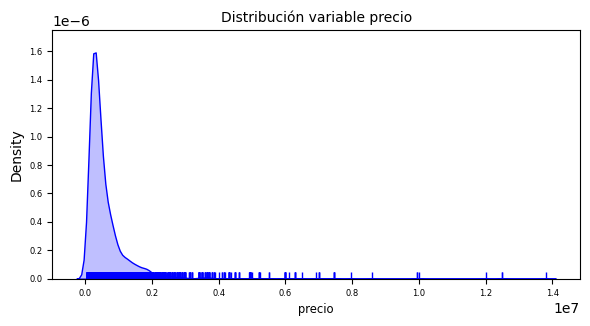

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 6))
sns.kdeplot(
    datos.precio,
    fill    = True,
    color   = "blue",
    ax      = axes[0]
)
sns.rugplot(
    datos.precio,
    color   = "blue",
    ax      = axes[0]
)
axes[0].set_title("Distribución variable precio", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)
    
# Se eliminan los axes vacíos
fig.delaxes(axes[1])

fig.tight_layout()

In [14]:
datos.select_dtypes(include=['float64', 'int64']).describe()

,precio,m2,dormitorios,baños
count,1.225800e+04,12258.000000,12258.000000,12258.000000
mean,5.850884e+05,116.143090,2.985724,1.785365
std,6.844774e+05,103.291025,1.329727,1.037059
min,4.200000e+04,13.000000,0.000000,1.000000
25%,2.370000e+05,68.000000,2.000000,1.000000
50%,3.750000e+05,89.000000,3.000000,2.000000
75%,6.822500e+05,130.000000,4.000000,2.000000
max,1.380000e+07,2781.000000,17.000000,11.000000


## VARIABLES NUMERICAS

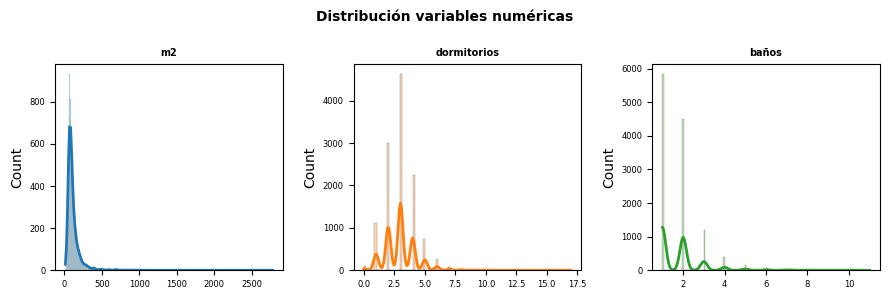

In [15]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int64']).columns
columnas_numeric = columnas_numeric.drop(['precio'])

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = datos,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.8)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

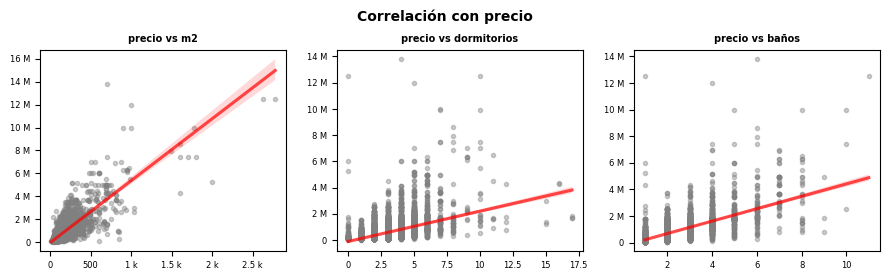

In [16]:
# Gráfico de distribución para cada variable numérica vs precio
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int64']).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = datos[colum],
        y           = datos['precio'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [3,4,5]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con precio', fontsize = 10, fontweight = "bold");


In [17]:
# Correlación entre columnas numéricas
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = datos.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
1,precio,m2,0.815323,0.815323
4,m2,precio,0.815323,0.815323
7,m2,baños,0.716623,0.716623
13,baños,m2,0.716623,0.716623
3,precio,baños,0.706966,0.706966
12,baños,precio,0.706966,0.706966
11,dormitorios,baños,0.585739,0.585739
14,baños,dormitorios,0.585739,0.585739
6,m2,dormitorios,0.566292,0.566292
9,dormitorios,m2,0.566292,0.566292


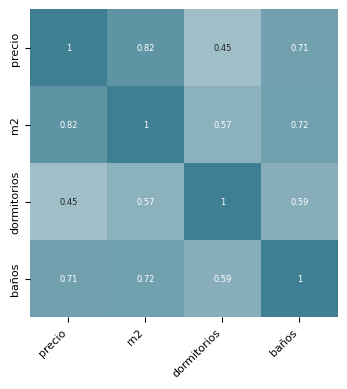

In [18]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)


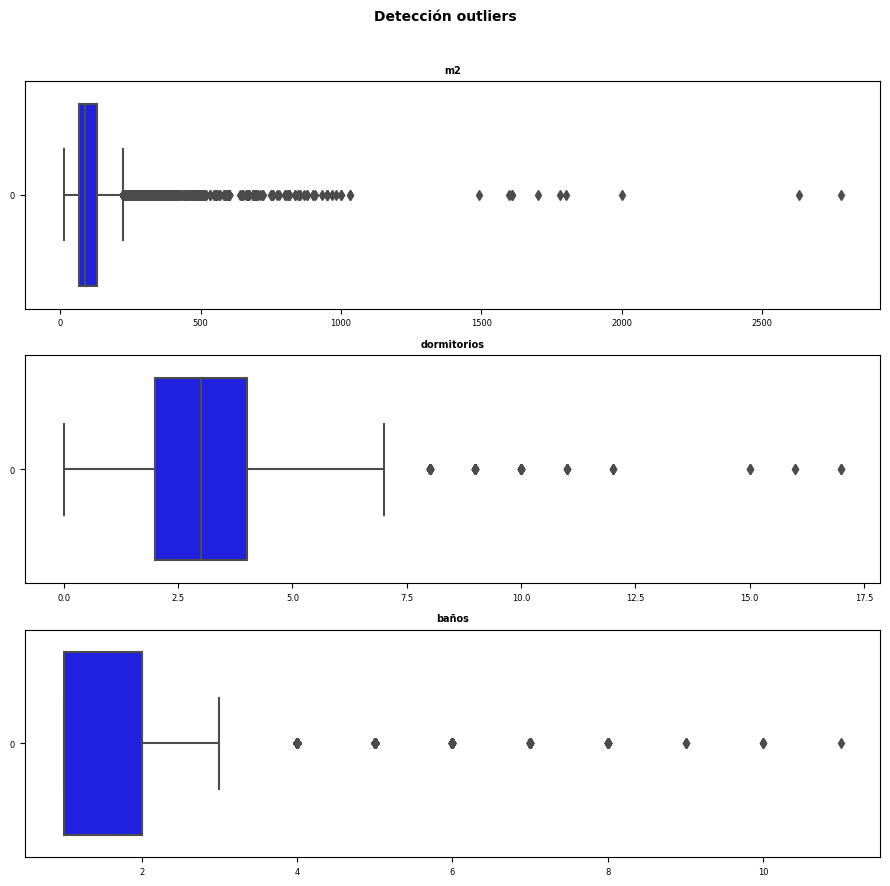

In [67]:
# Gráfico de distribución boxplot de cada cada variable cuantitativa para detección outliers
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(9, 9))
axes = axes.flat
columnas_object = datos.select_dtypes(include=['float64','int64']).columns
columnas_object = columnas_object.drop(['precio'])

for i, colum in enumerate(columnas_object):
    sns.boxplot(
        x     = colum,
        #y     = 'precio',
        data  = datos,
        color = 'blue',
        ax    = axes[i]
    )
    axes[i].set_title(f"{colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
#for i in [6,7]:
    #fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Detección outliers', fontsize = 10, fontweight = "bold");

## VARIABLES CUALITATIVAS

In [20]:
# Variables cualitativas (tipo object)
# ==============================================================================
datos.select_dtypes(include=['object']).describe()

,id,tipo,parking,distrito,cambio_precio
count,12258,12258,12258,12258,12258
unique,12258,12,2,10,2
top,id41022004397639,FLAT,No,Eixample,No
freq,1,9938,10685,2556,8718


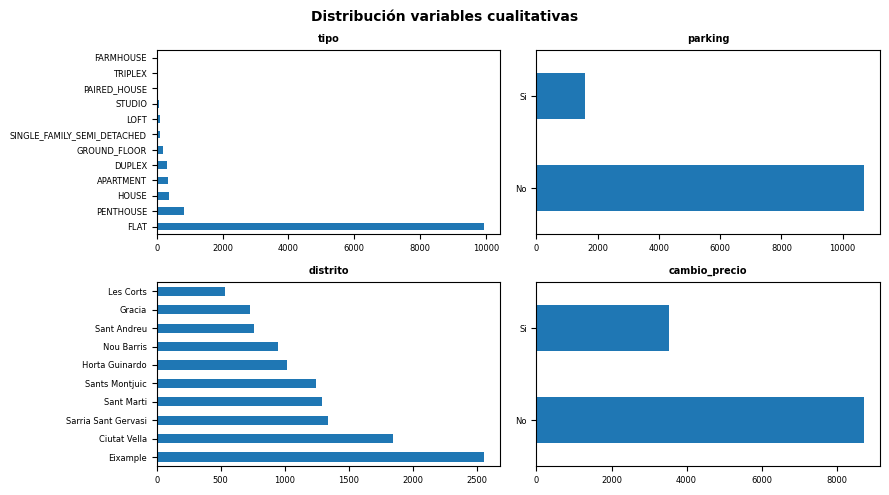

In [21]:
# Gráfico para cada variable cualitativa
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_object = datos.select_dtypes(include=['object']).columns
columnas_object = columnas_object.drop(['id'])

for i, colum in enumerate(columnas_object):
    datos[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold");


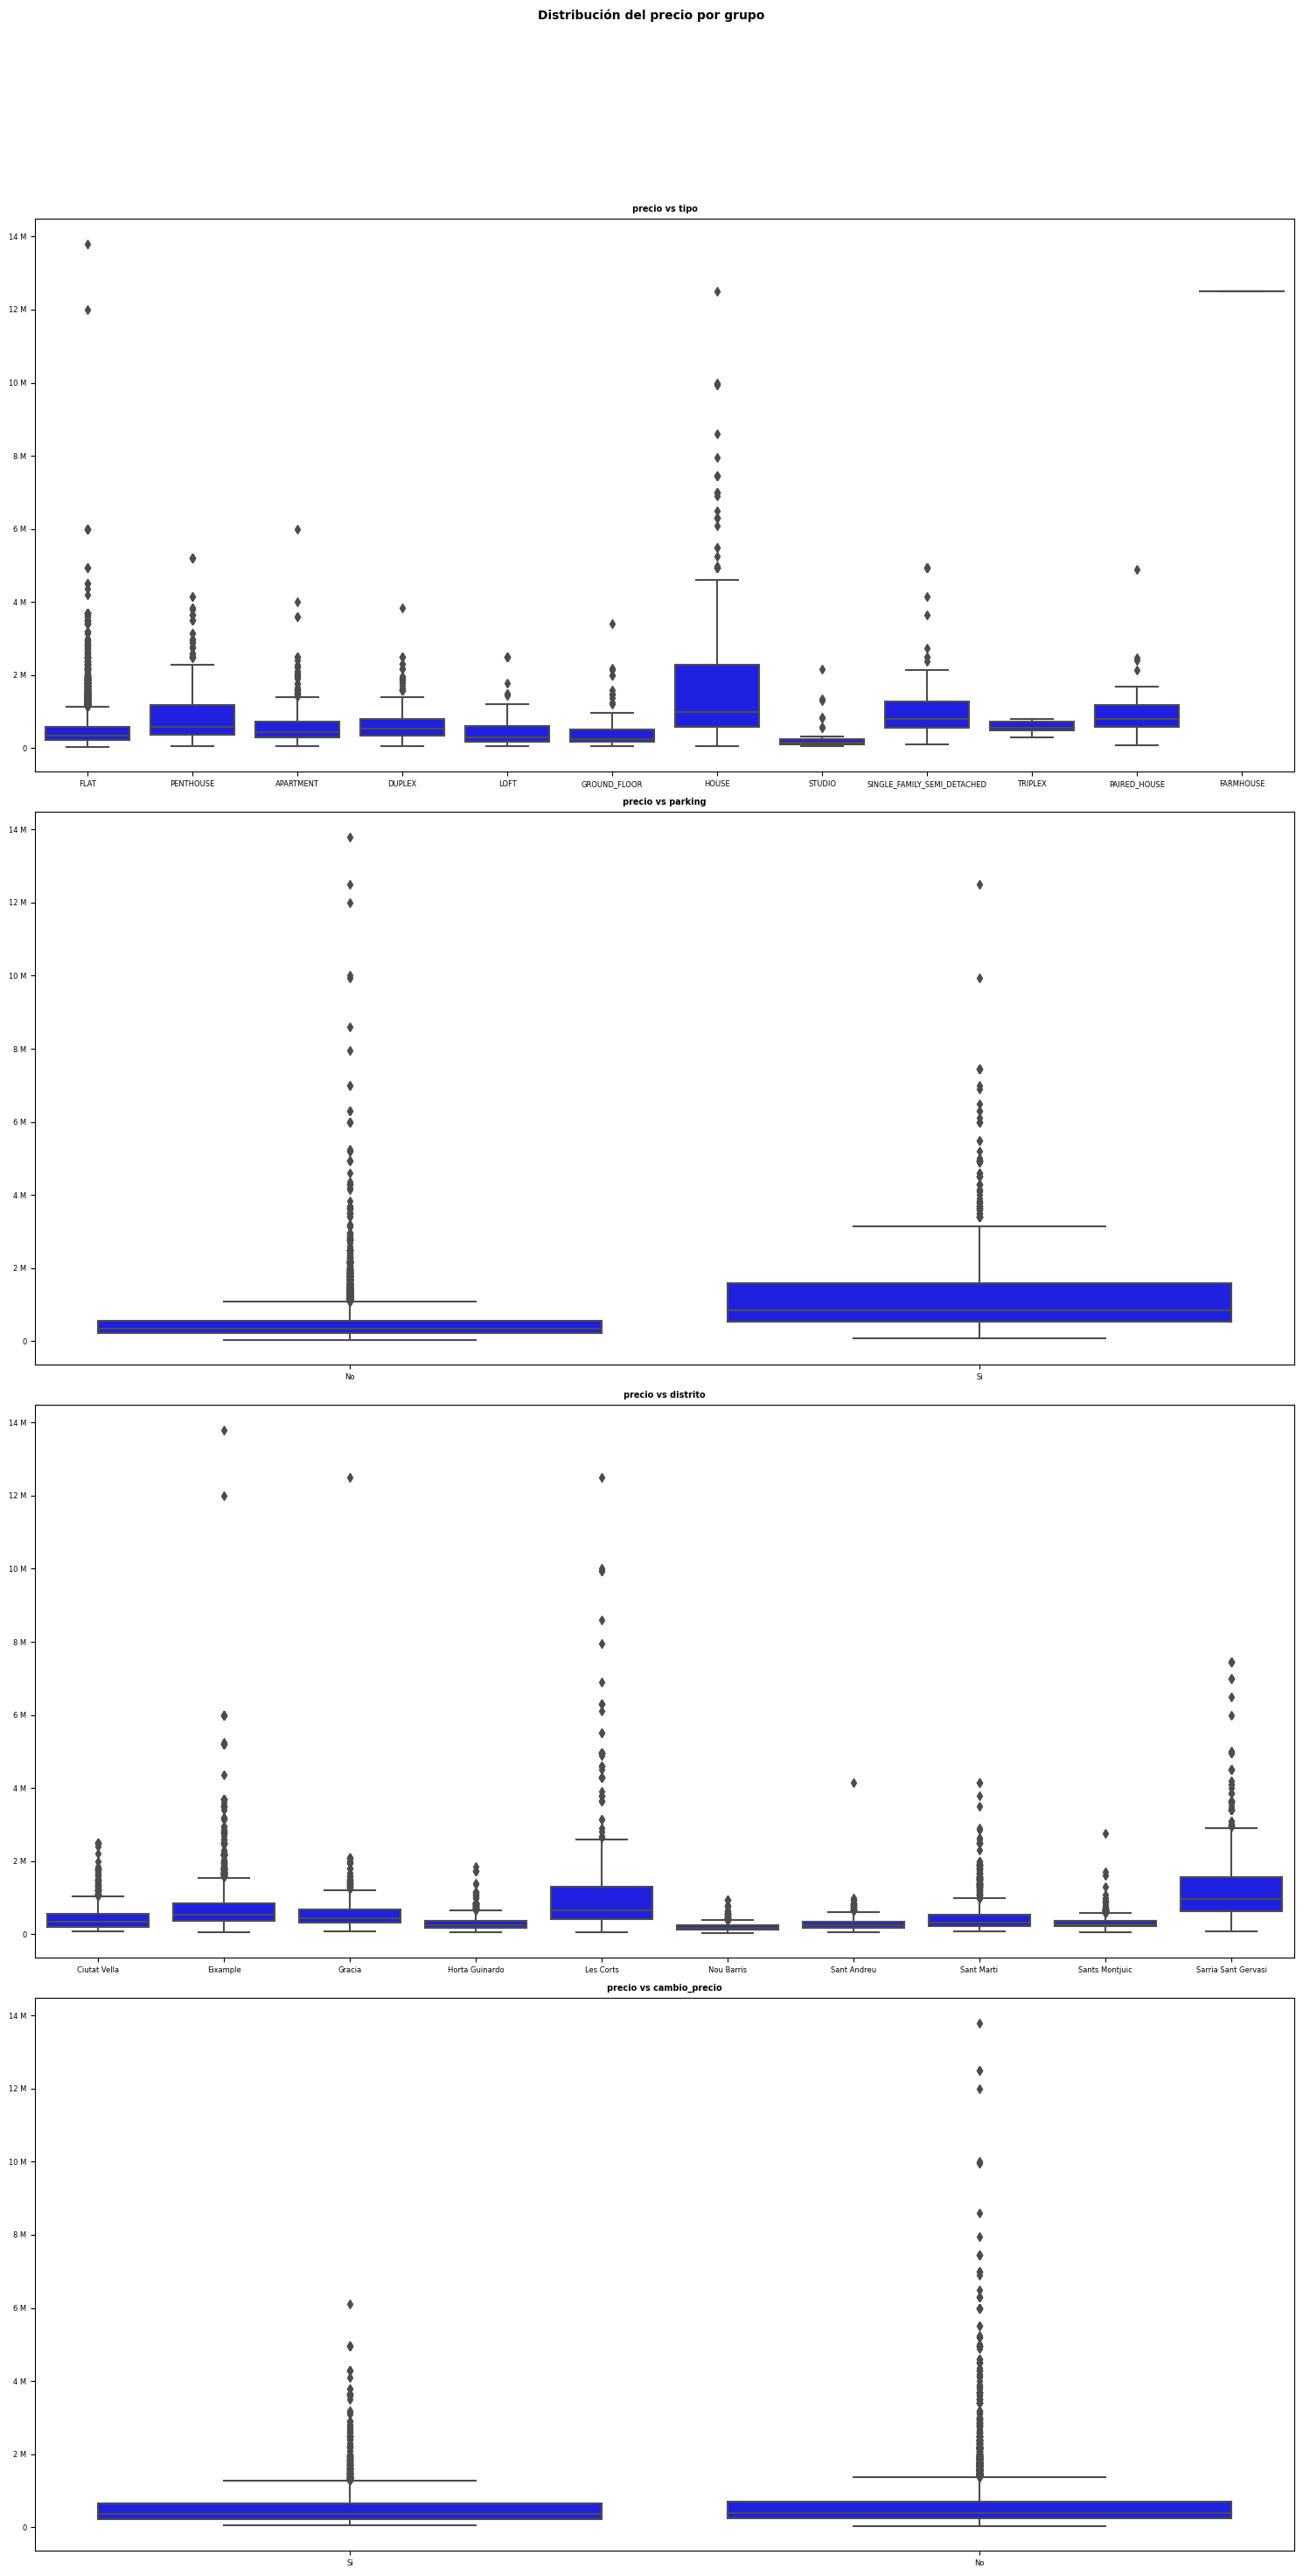

In [22]:
# Gráfico relación entre el precio y cada variable cualitativa
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 30))
axes = axes.flat
columnas_object = datos.select_dtypes(include=['object']).columns
columnas_object = columnas_object.drop(['id'])

for i, colum in enumerate(columnas_object):
    sns.boxplot(
        x     = colum,
        y     = 'precio',
        data  = datos,
        color = 'blue',
        ax    = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
#for i in [6,7]:
    #fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución del precio por grupo', fontsize = 10, fontweight = "bold");

Del análisis anterior, concluimos que las variables numéricas tienen todas muchos outliers de manera que emplearemos RobustScaler en el preprocesado. Para las variables cualitativas aplicaremos OneHotEncoder para binarizarlas.

## DIVISION TRAIN TEST

In [23]:
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop(['precio','id'], axis = 'columns'),
                                        datos['precio'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [24]:
print("Partición de entrenamento")
print("-----------------------")
print(y_train.describe())

Partición de entrenamento
-----------------------
count    9.806000e+03
mean     5.858177e+05
std      6.822919e+05
min      4.200000e+04
25%      2.380000e+05
50%      3.750000e+05
75%      6.894028e+05
max      1.250000e+07
Name: precio, dtype: float64


In [25]:
y_train.shape

(9806,)

In [26]:

print("Partición de test")
print("-----------------------")
print(y_test.describe())

Partición de test
-----------------------
count    2.452000e+03
mean     5.821719e+05
std      6.932814e+05
min      6.000000e+04
25%      2.350000e+05
50%      3.800000e+05
75%      6.750000e+05
max      1.380000e+07
Name: precio, dtype: float64


In [27]:
y_test.shape

(2452,)

## ALGORITMOS

En los siguientes apartados se entrenan diferentes modelos de machine learning con el objetivo de compararlos e identificar el que mejor resultado obtiene prediciendo el precio de las viviendas.

### KNN

In [28]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor


# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', RobustScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe_KNN= Pipeline([('preprocessing', preprocessor),
                 ('modelo', KNeighborsRegressor())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {'modelo__n_neighbors': np.linspace(1, 100, 500, dtype=int)}

# Búsqueda random grid
grid= RandomizedSearchCV(
        estimator  = pipe_KNN,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__n_neighbors,mean_test_score,std_test_score,mean_train_score,std_train_score
12,7,-339725.949317,33882.904721,-291362.357942,8709.862103


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


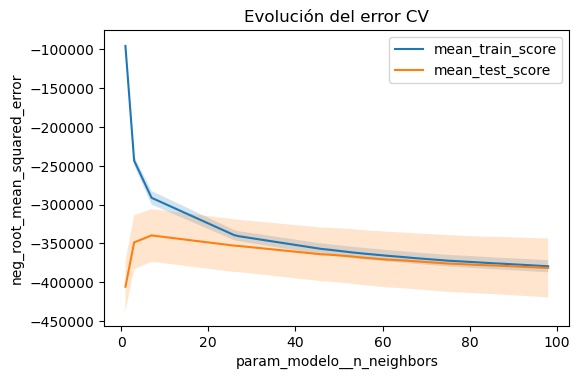

In [29]:
# Gráfico resultados validación cruzada para cada hiperparámetro
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 3.84))
hiperparametro = 'param_modelo__n_neighbors'
resultados = resultados.sort_values(hiperparametro, ascending = False)
metrica    = grid.scoring

resultados.plot(hiperparametro, 'mean_train_score', ax=ax)
resultados.plot(hiperparametro, 'mean_test_score', ax=ax)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel(metrica);

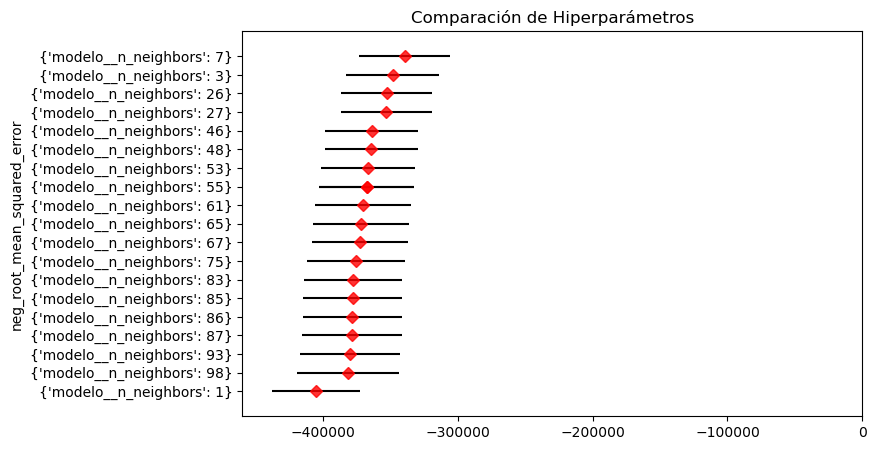

In [30]:
fig, ax = plt.subplots(figsize=(8, 5))
resultados = resultados.sort_values('mean_test_score', ascending = True)
ax.barh(
    [str(d) for d in resultados['params']],
    resultados['mean_test_score'],
    xerr=resultados['std_test_score'],
    align='center',
    alpha=0
)
ax.plot(
    resultados['mean_test_score'],
    [str(d) for d in resultados['params']],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Comparación de Hiperparámetros')
ax.set_ylabel(metrica);

In [31]:
# Error de test del modelo final
# ==============================================================================
from sklearn.metrics import mean_squared_error

modelo_final_knn = grid.best_estimator_
predicciones = modelo_final_knn.predict(X = X_test)
rmse_knn = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False)
print(f"El error (rmse) de test es: {round(rmse_knn,2)}")

El error (rmse) de test es: 372038.05


In [32]:
# Error de test del modelo final
# ==============================================================================
from sklearn.metrics import r2_score

r2_knn = r2_score(
            y_true  = y_test,
            y_pred  = predicciones)
print(f"El coeficiente de determinación (r2) de test es: {round(r2_knn,2)}")

El coeficiente de determinación (r2) de test es: 0.71


In [33]:
score =round(modelo_final_knn.score(X_train,y_train),2)
print('Metrica del modelo', score)
score_pred = round(modelo_final_knn.score(X_test,y_test),2)
print('Metrica en test', score_pred)

Metrica del modelo 0.82
Metrica en test 0.71


In [34]:
from sklearn.metrics import mean_absolute_percentage_error

mape_knn=mean_absolute_percentage_error(
            y_true  = y_test,
            y_pred  = predicciones)
print(f"El error (mape) de test es: {round(mape_knn,2)}")


El error (mape) de test es: 0.31


### Regresión Lineal Ridge y Lasso

In [35]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.linear_model import Ridge

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', RobustScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe_lm = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {'modelo__alpha': np.logspace(-5, 5, 500)}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe_lm,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
4,13.560151,-345515.767715,22810.39648,-343432.367463,5636.199705


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


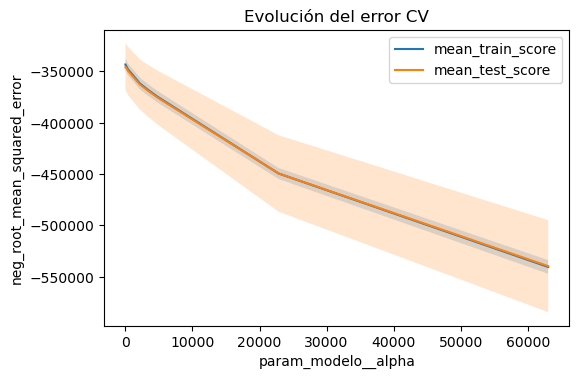

In [36]:
# Gráfico resultados validación cruzada para cada hiperparámetro
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))
hiperparametro = 'param_modelo__alpha'
resultados = resultados.sort_values(hiperparametro, ascending = False)
metrica    = grid.scoring

resultados.plot(hiperparametro, 'mean_train_score', ax=ax)
resultados.plot(hiperparametro, 'mean_test_score', ax=ax)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel(metrica);


In [37]:
# Error de test del modelo final
# ==============================================================================
modelo_final_lm = grid.best_estimator_
predicciones = modelo_final_lm.predict(X = X_test)
rmse_lm = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False)
print(f"El error (rmse) de test es: {round(rmse_lm,2)}")

El error (rmse) de test es: 378894.26


In [38]:
# Error de test del modelo final
# ==============================================================================
from sklearn.metrics import r2_score

r2_lm = r2_score(
            y_true  = y_test,
            y_pred  = predicciones)
print(f"El coeficiente de determinación (r2) de test es: {round(r2_lm,2)}")

El coeficiente de determinación (r2) de test es: 0.7


In [39]:
score =round(modelo_final_lm.score(X_train,y_train),2)
print('Metrica del modelo', score)
score_pred = round(modelo_final_lm.score(X_test,y_test),2)
print('Metrica en test', score_pred)

Metrica del modelo 0.75
Metrica en test 0.7


In [40]:
from sklearn.metrics import mean_absolute_percentage_error

mape_lm=mean_absolute_percentage_error(
            y_true  = y_test,
            y_pred  = predicciones)
print(f"El error (mape) de test es: {round(mape_lm,2)}")


El error (mape) de test es: 0.37


### Random Forest

In [41]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', RobustScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe_rf= Pipeline([('preprocessing', preprocessor),
                 ('modelo', RandomForestRegressor())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro

param_distributions = {
    'modelo__n_estimators': [50, 100, 1000, 2000],
    'modelo__max_features': [3, 5, 7, 1.0],
    'modelo__max_depth'   : [None, 3, 5, 10, 20]
}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe_rf,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)


/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


,param_modelo__n_estimators,param_modelo__max_features,param_modelo__max_depth,mean_test_score,std_test_score,mean_train_score,std_train_score
16,1000,1.0,10,-313763.533649,27451.810068,-201080.680527,4067.52671


In [42]:
# Error de test del modelo final
# ==============================================================================
modelo_final_rf= grid.best_estimator_
predicciones = modelo_final_rf.predict(X = X_test)
rmse_rf = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False)
print(f"El error (rmse) de test es: {round(rmse_rf,2)}")

El error (rmse) de test es: 356920.79


In [43]:
# Error de test del modelo final
# ==============================================================================
from sklearn.metrics import r2_score

r2_rf = r2_score(
            y_true  = y_test,
            y_pred  = predicciones)
print(f"El coeficiente de determinación (r2) de test es: {round(r2_rf,2)}")

El coeficiente de determinación (r2) de test es: 0.73


In [44]:
score =round(modelo_final_rf.score(X_train,y_train),2)
print('Metrica del modelo', score)
score_pred = round(modelo_final_rf.score(X_test,y_test),2)
print('Metrica en test', score_pred)

Metrica del modelo 0.91
Metrica en test 0.73


In [46]:
from sklearn.metrics import mean_absolute_percentage_error

mape_rf=mean_absolute_percentage_error(
            y_true  = y_test,
            y_pred  = predicciones)
print(f"El error (mape) de test es: {round(mape_rf,2)}")


El error (mape) de test es: 0.29


### Gradient Boosting Tree

In [47]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', RobustScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe_gbm = Pipeline([('preprocessing', preprocessor),
                 ('modelo', GradientBoostingRegressor())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro

param_distributions = {
    'modelo__n_estimators': [50, 100, 1000, 2000],
    'modelo__max_features': [3, 5, 7, 1.0],
    'modelo__max_depth'   : [None, 3, 5, 10, 20],
    'modelo__subsample'   : [0.5,0.7, 1]
}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe_gbm,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__subsample,param_modelo__n_estimators,param_modelo__max_features,param_modelo__max_depth,mean_test_score,std_test_score,mean_train_score,std_train_score
4,0.7,1000,7,3,-317495.567342,28092.085823,-209985.863999,3574.742741


In [48]:
# Error de test del modelo final
# ==============================================================================
modelo_final_gbm = grid.best_estimator_
predicciones = modelo_final_gbm.predict(X = X_test)
rmse_gbm = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False)
print(f"El error (rmse) de test es: {round(rmse_gbm,2)}")


El error (rmse) de test es: 347896.98


In [49]:
# Error de test del modelo final
# ==============================================================================
from sklearn.metrics import r2_score

r2_gbm = r2_score(
            y_true  = y_test,
            y_pred  = predicciones)
print(f"El coeficiente de determinación (r2) de test es: {round(r2_gbm,2)}")

El coeficiente de determinación (r2) de test es: 0.75


In [50]:
score =round(modelo_final_gbm.score(X_train,y_train),2)
print('Metrica del modelo', score)
score_pred = round(modelo_final_gbm.score(X_test,y_test),2)
print('Metrica en test', score_pred)

Metrica del modelo 0.9
Metrica en test 0.75


In [51]:
from sklearn.metrics import mean_absolute_percentage_error

mape_gbm=mean_absolute_percentage_error(
            y_true  = y_test,
            y_pred  = predicciones)
print(f"El error (mape) de test es: {round(mape_gbm,2)}")


El error (mape) de test es: 0.29


## Comparación

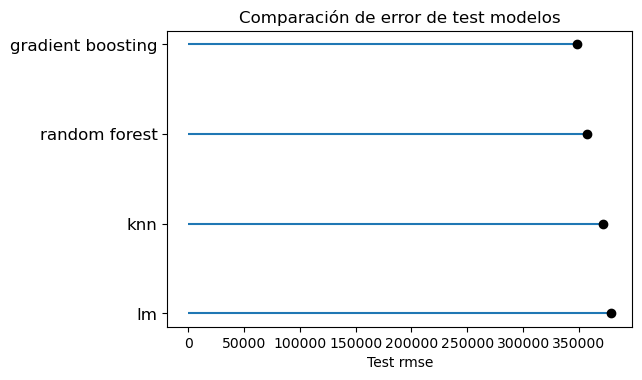

In [52]:
error_modelos = pd.DataFrame({
                        'modelo': ['knn', 'lm', 'random forest', 'gradient boosting'],
                        'rmse': [rmse_knn, rmse_lm, rmse_rf, rmse_gbm]
                     })
error_modelos = error_modelos.sort_values('rmse', ascending=False)

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.hlines(error_modelos.modelo, xmin=0, xmax=error_modelos.rmse)
ax.plot(error_modelos.rmse, error_modelos.modelo, "o", color='black')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title('Comparación de error de test modelos'),
ax.set_xlabel('Test rmse');

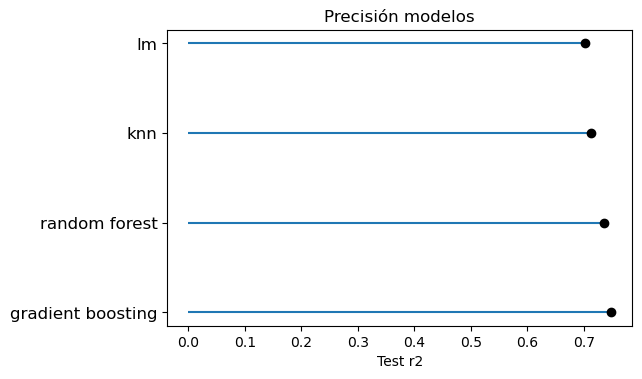

In [53]:
precisión_modelos = pd.DataFrame({
                        'modelo': ['knn', 'lm', 'random forest', 'gradient boosting'],
                        'r2': [r2_knn, r2_lm, r2_rf, r2_gbm]
                     })
precisión_modelos = precisión_modelos.sort_values('r2', ascending=False)

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.hlines(precisión_modelos.modelo, xmin=0, xmax=precisión_modelos.r2)
ax.plot(precisión_modelos.r2, precisión_modelos.modelo, "o", color='black')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title('Precisión modelos'),
ax.set_xlabel('Test r2');

## PREDICCIONES CON EL MEJOR MODELO 

Por las métricas obtenidas anteriormente escogemos Gradient Boosting

In [71]:
predicciones=modelo_final_gbm.predict(X_test)
predicciones

array([519773.31037354, 198311.33409931, 276730.84507871, ...,
       683234.56047749, 290537.32949659, 615997.07663141])

In [55]:
# Se crea un dataframe con las predicciones y el valor real
df_predicciones = pd.DataFrame({'precio' : y_test, 'prediccion' : predicciones})
df_predicciones

,precio,prediccion
5462,630000,5.197733e+05
5615,189000,1.983113e+05
5671,170000,2.767308e+05
11511,1295000,1.032876e+06
1577,750000,9.356460e+05
12060,860000,7.200537e+05
6982,127100,1.473288e+05
7722,180000,1.931778e+05
492,605000,5.160749e+05
4062,635000,5.272006e+05


In [56]:
df_predicciones.describe()

,precio,prediccion
count,2.452000e+03,2.452000e+03
mean,5.821719e+05,5.829928e+05
std,6.932814e+05,6.404302e+05
min,6.000000e+04,-2.654663e+05
25%,2.350000e+05,2.446225e+05
50%,3.800000e+05,3.953124e+05
75%,6.750000e+05,6.967309e+05
max,1.380000e+07,1.128790e+07


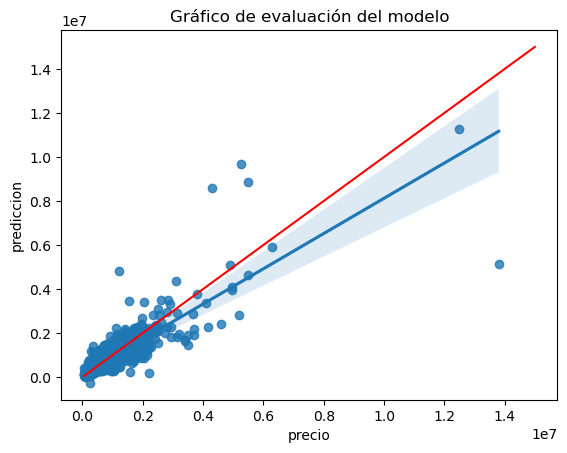

In [57]:
g=sns.regplot(data=df_predicciones,x=df_predicciones['precio'],y=df_predicciones['prediccion'])
X_plot = np.linspace(50000, 15000000, 15000000)
Y_plot = X_plot
plt.title('Gráfico de evaluación del modelo')
plt.plot(X_plot, Y_plot, color='r')
plt.show()

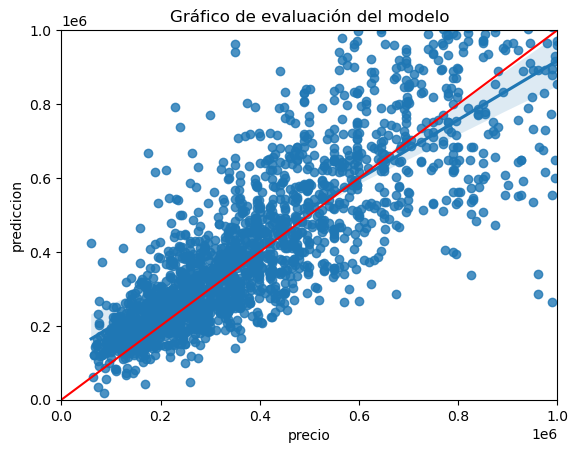

In [58]:
g1=sns.regplot(data=df_predicciones,x=df_predicciones['precio'],y=df_predicciones['prediccion'])
g1.set(ylim=(0, 1000000),xlim=(0, 1000000))
X_plot = np.linspace(0, 1000000, 1000000)
Y_plot = X_plot
plt.title('Gráfico de evaluación del modelo')
plt.plot(X_plot, Y_plot, color='r')
plt.show()

In [65]:
Results=round(pd.DataFrame(
    {'KNN' : [r2_knn,rmse_knn,mape_knn],
'Linear Model Ridge' : [r2_lm,rmse_lm,mape_lm],
'Random Forest' :[r2_rf,rmse_rf,mape_rf],
'XGBoost' :[r2_gbm,rmse_gbm,mape_gbm]},
    index = ['r2', 'rmse','mape']),2)
Results

,KNN,Linear Model Ridge,Random Forest,XGBoost
r2,0.71,0.70,0.73,0.75
rmse,372038.05,378894.26,356920.79,347896.98
mape,0.31,0.37,0.29,0.29
